In [1]:
from time import sleep, time

def inc(x):
    sleep(1)
    return x + 1

def inc_right(x):
    sleep(1)
    return x + 1

In [2]:
from streamz import Stream

source = Stream()
left = source.map(inc).map(inc)
right = source.map(inc_right).zip(left).map(sum).sink(print)

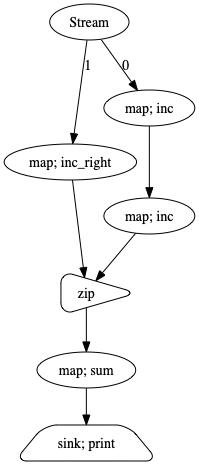

In [3]:
source.visualize()

In [4]:
import waterhealer as wh

source = wh.source.metrics(source = source)

In [5]:
source.emit(3)

9


In [6]:
import requests
from prometheus_client.parser import text_string_to_metric_families

metrics = requests.get('http://localhost:8000/').content
for family in text_string_to_metric_families(metrics.decode()):
    for sample in family.samples:
        print("Name: {0} Labels: {1} Value: {2}".format(*sample))

Name: python_gc_objects_collected_total Labels: {'generation': '0'} Value: 8286.0
Name: python_gc_objects_collected_total Labels: {'generation': '1'} Value: 800.0
Name: python_gc_objects_collected_total Labels: {'generation': '2'} Value: 198.0
Name: python_gc_objects_uncollectable_total Labels: {'generation': '0'} Value: 0.0
Name: python_gc_objects_uncollectable_total Labels: {'generation': '1'} Value: 0.0
Name: python_gc_objects_uncollectable_total Labels: {'generation': '2'} Value: 0.0
Name: python_gc_collections_total Labels: {'generation': '0'} Value: 325.0
Name: python_gc_collections_total Labels: {'generation': '1'} Value: 29.0
Name: python_gc_collections_total Labels: {'generation': '2'} Value: 2.0
Name: python_info Labels: {'implementation': 'CPython', 'major': '3', 'minor': '7', 'patchlevel': '5', 'version': '3.7.5'} Value: 1.0
Name: total_before_source__inc_total Labels: {} Value: 1.0
Name: total_before_source__inc_created Labels: {} Value: 1587538019.773171
Name: total_after